## Observations and Insights

## Dependencies and starter code

In [486]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
merged_data=pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [487]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
#Complete calcuations for mean, median, variance, standard deviation, and SEM
mean_tumor_volume=merged_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
mean_tumor_volume
    
tumor_median=merged_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_median

tumor_var=merged_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_var

tumor_std=merged_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_std

tumor_sem=merged_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
tumor_sem

tumor_volume_df=pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume, 'Median Tumor Volume': tumor_median, 'Tumor Volume Variance': tumor_var, 'Tumor Volume Standard Deviation':tumor_std, 'Tumor Volume SEM': tumor_sem})
tumor_volume_df.round(2)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

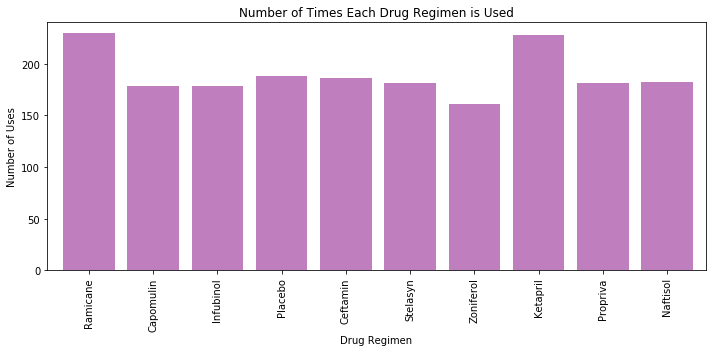

In [488]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Create variable for drug regimen count grouped
grouped_drug=merged_data.groupby(['Drug Regimen'])
grouped_drug

grouped_drug_count=grouped_drug['Drug Regimen'].count()
grouped_drug_count
#print(grouped_drug_count)

drug_x_label=merged_data.loc[:,['Drug Regimen']]
#print(drug_x_label)

drug_name_unique=drug_x_label['Drug Regimen'].unique()
#print(drug_name_unique)

#Set x axis and tick locations
x_axis = np.arange(len(grouped_drug_count))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, grouped_drug_count, color='purple', alpha=0.5, align="edge")
plt.xticks(tick_locations, drug_name_unique, rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(grouped_drug_count)+10)

# Set a Title and labels
plt.title("Number of Times Each Drug Regimen is Used")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Uses")

# Show the graph
plt.tight_layout()
plt.show()

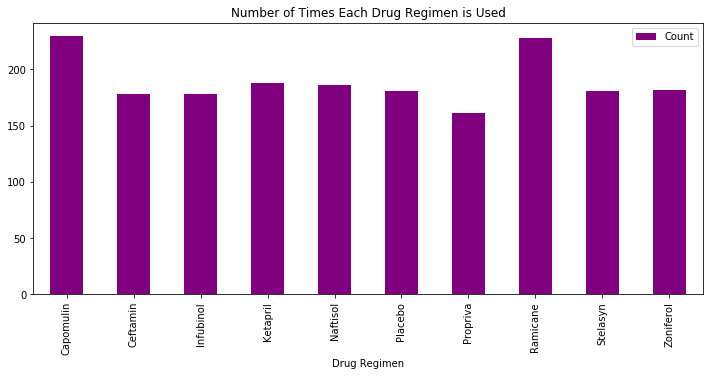

In [489]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Filter the DataFrame down only to those columns to chart
grouped_drug=merged_data.groupby(['Drug Regimen'])
grouped_drug_count=grouped_drug['Drug Regimen'].count()
drug_x_label=merged_data.loc[:,['Drug Regimen']]
drug_name_unique=drug_x_label['Drug Regimen'].unique()

#Create a DataFrame down only to those columns to chart
drug_regimen_df =pd.DataFrame({'Drug Regimen': drug_name_unique, 'Count': grouped_drug_count})
drug_regimen_df

# Use DataFrame.plot() in order to create a bar chart of the data
drug_regimen_df.plot(kind="bar", color='purple', figsize=(12,5))

# Set a title for the chart
plt.title("Number of Times Each Drug Regimen is Used")
plt.show()


## Pie plots

Sex
Female    935
Male      958
Name: Sex, dtype: int64
There are 935 female mice and 958 male mice


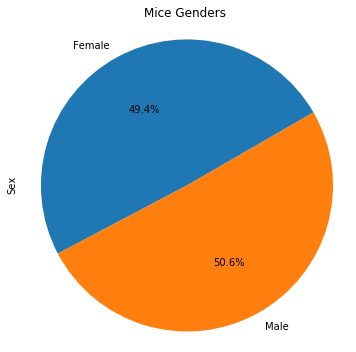

In [490]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Create variable for the female mice
mice_gender=merged_data.groupby(['Sex'])
mice_gender_count=mice_gender['Sex'].count()
print(mice_gender_count)
male_mice=mice_gender_count['Male']
male_mice
female_mice=mice_gender_count['Female']
print(f'There are {female_mice} female mice and {male_mice} male mice')

mice_gender_pie=mice_gender_count.plot(kind="pie", title=('Mice Genders'),figsize=(5, 5), autopct='%1.1f%%',startangle=30)
mice_gender_pie.set_ylabel("Sex")
plt.tight_layout()
plt.axis("equal")
plt.show()

/Users/juliedundas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


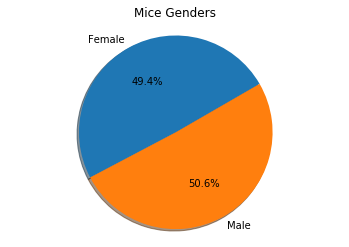

In [491]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


gender_df = pd.DataFrame({'Female': female_mice, 'Male':male_mice},index = [0])
gender_df

genders=['Female', 'Male']

plt.pie(gender_df, labels=genders, autopct="%1.1f%%", shadow=True, startangle=30)
plt.title('Mice Genders')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [492]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
stats_dataframe= merged_data.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)']
print(stats_dataframe.round(2))


IQR = stats_dataframe['75%'] - stats_dataframe['25%']
print(IQR)

              count   mean   std    min    25%    50%    75%    max
Drug Regimen                                                       
Capomulin     230.0  40.68  4.99  23.34  37.69  41.56  45.00  48.16
Ceftamin      178.0  52.59  6.27  45.00  47.21  51.78  56.80  68.92
Infubinol     178.0  52.88  6.57  36.32  47.31  51.82  57.31  72.23
Ketapril      188.0  55.24  8.28  45.00  48.23  53.70  60.87  78.57
Naftisol      186.0  54.33  8.13  45.00  47.29  52.51  59.96  76.67
Placebo       181.0  54.03  7.82  45.00  47.46  52.29  59.92  73.21
Propriva      161.0  52.32  6.51  45.00  47.08  50.85  56.18  72.46
Ramicane      228.0  40.22  4.85  22.05  36.67  40.67  45.00  47.62
Stelasyn      181.0  54.23  7.71  45.00  48.05  52.43  58.72  75.12
Zoniferol     182.0  53.24  6.97  45.00  47.34  51.82  57.95  73.32
Drug Regimen
Capomulin     7.314067
Ceftamin      9.593010
Infubinol    10.002091
Ketapril     12.637964
Naftisol     12.677160
Placebo      12.457882
Propriva      9.103578
Ramicane  

In [493]:
# Generate  data frame in order to create a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume=merged_data.groupby(['Mouse ID']).max()['Tumor Volume (mm3)']
final_tumor_volume

reset_index=final_tumor_volume.reset_index()
reset_index

merged_tumor_data=pd.merge(reset_index, merged_data, how="left", on='Tumor Volume (mm3)')
merged_tumor_data.head()

,Mouse ID_x,Tumor Volume (mm3),Mouse ID_y,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites
0,a203,67.973419,a203,Infubinol,Female,20,23,45,2
1,a251,65.525743,a251,Infubinol,Female,21,25,45,1
2,a262,70.717621,a262,Placebo,Female,17,29,45,4
3,a275,62.999356,a275,Ceftamin,Female,20,28,45,3
4,a366,63.440686,a366,Stelasyn,Female,16,29,30,1


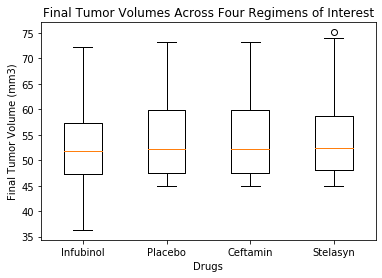

In [494]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
infubinol_all = merged_data[(merged_data["Drug Regimen"] == 'Infubinol')]
infubinol_volumes = infubinol_all['Tumor Volume (mm3)']
infubinol_volumes

placebo_all=merged_data[(merged_data["Drug Regimen"] == 'Placebo')]
placebo_volumes=placebo_all['Tumor Volume (mm3)']
placebo_volumes


ceftamin_all=merged_data[(merged_data["Drug Regimen"] == 'Ceftamin')]
ceftamin_volumes=placebo_all['Tumor Volume (mm3)']
ceftamin_volumes

stelasyn_all=merged_data[(merged_data["Drug Regimen"] == 'Stelasyn')]
stelasyn_volumes=stelasyn_all['Tumor Volume (mm3)']
stelasyn_volumes


boxplot_data=[infubinol_volumes,placebo_volumes,ceftamin_volumes,stelasyn_volumes]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes Across Four Regimens of Interest')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drugs')
ax1.set_xticklabels(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn'])
ax1.boxplot(boxplot_data)
plt.show()

## Line and scatter plots

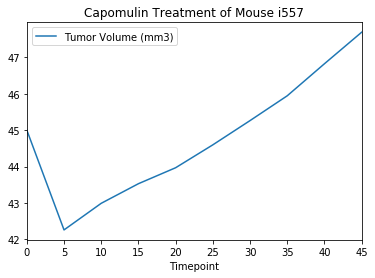

In [495]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_i557 = merged_data[(merged_data["Mouse ID"] == 'i557')]
mouse_i557

mouse_i557_filtered = mouse_i557[["Timepoint", "Tumor Volume (mm3)"]]
mouse_i557_filtered

mouse_i557_indexed = mouse_i557_filtered.set_index(['Timepoint'])
mouse_i557_indexed

lines.set(ylabel='Tumor Volume (mm3)')
lines = mouse_i557_indexed.plot.line(title='Capomulin Treatment of Mouse i557')

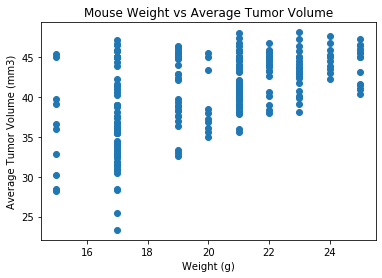

In [500]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = merged_data[(merged_data["Drug Regimen"] == 'Capomulin')]
capomulin_data

capomulin_weight_tum = capomulin_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_weight_tum

avg_tumor = capomulin_data['Tumor Volume (mm3)'].mean()
avg_tumor


weight = capomulin_weight_tum['Weight (g)']
tumor_vol = capomulin_weight_tum['Tumor Volume (mm3)']
plt.scatter(weight, tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen